In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [10]:
df=pd.read_csv('D:\datasets\FuelConsumptionCo2.csv')

In [11]:
pf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
pf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


Text(0, 0.5, 'Emission')

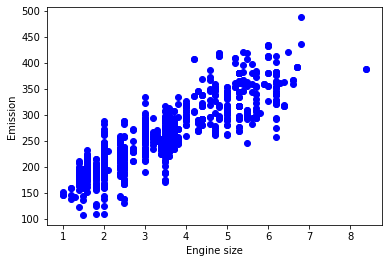

In [12]:
plt.scatter(pf.ENGINESIZE,pf.CO2EMISSIONS,color='blue')
plt.xlabel('Engine size')
plt.ylabel('Emission')


In [13]:
msk=np.random.rand(len(df))<.8
train=pf[msk]
test=pf[~msk]


## train data distribution

Text(0, 0.5, 'EMISSION')

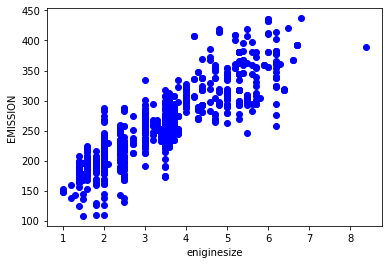

In [14]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.xlabel('eniginesize')
plt.ylabel('EMISSION')

## MULTIPLE LINEAR REGRESSION

In [15]:
from sklearn import linear_model
modx=linear_model.LinearRegression()
x=np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y=np.asanyarray(train[['CO2EMISSIONS']])
modx.fit(x,y)
#THE COEFFICIENTS
print('Coefficients:',modx.coef_)
print('INTERCEPTS:',modx.intercept_)

Coefficients: [[11.0125811   7.03565586  9.93898048]]
INTERCEPTS: [63.83563081]


## prediction

In [18]:
y_hat=modx.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x=np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y=np.asanyarray(test[['CO2EMISSIONS']])
print('Residual sum of squares:%.2f'%np.mean((y_hat-y)**2))
#EXPLAINED VARIANE SCORE:1IS A PERFECT PREDICTION
print('Variance score:%.2f'%modx.score(x,y)) #note-It takes a feature matrix X_test and the expected target values y_test. Predictions for X_test are compared with y_test and either accuracy.IT all does this internally

Residual sum of squares:588.02
Variance score:0.85


ValueError: x and y must be the same size

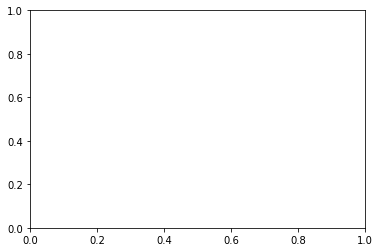